# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [7]:
import pandas as pd

In [8]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [9]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station=pd.read_csv('df_seoul_bus_station.csv')
df_seoul_moving=pd.read_csv('df_seoul_moving.csv')
df_seoul_business=pd.read_csv('df_seoul_business.csv')
df_seoul_people=pd.read_csv('df_seoul_people.csv')

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.head()

,구,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [12]:
df_seoul_bus_station.rename(columns={"구":"자치구"},inplace=True)
df_seoul_bus_station

,자치구,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동시간,총 이동인구
0,11010,30.278479,29.153578,23722310,22840982.81
1,11020,29.803839,29.298197,23806740,23402842.95
2,11030,29.478435,23.819052,21306040,17215624.50
3,11040,29.782858,28.153984,20913880,19770065.27
4,11050,30.212457,29.733522,20983760,20651120.15


In [14]:
df_seoul_business.head()

,자치구,한식일반음식점업(종사자),커피전문점(종사자),기타주점업(종사자)
0,종로구,5912,3613,1413
1,중구,6414,3542,982
2,용산구,2987,2076,1332
3,성동구,2785,1859,621
4,광진구,2861,1887,1577


In [15]:
df_seoul_people

,자치구,세대,인구,65세이상고령자
0,종로구,73766,153684,28064
1,중구,63767,131450,24742
2,용산구,111207,236518,39461
3,성동구,134533,291609,46896
4,광진구,169483,353110,52604
5,동대문구,169695,352592,62963
6,중랑구,187693,393600,72851
7,성북구,197296,442680,75719
8,강북구,144725,300824,64961
9,도봉구,138836,318100,65122


---

In [16]:
#데이터프레임 결합 하기
df1=pd.merge(standard,df_seoul_moving,how='inner')
df2=pd.merge(df1,df_seoul_bus_station,how='inner')
df3=pd.merge(df2,df_seoul_business,how='inner')
df4=pd.merge(df3,df_seoul_people,how='inner')
df4.rename(columns={'이동인구(합)':'평균 이동인구'},inplace=True)
df4

,도착 시군구 코드,자치구,평균 이동 시간(분),평균 이동인구,총 이동시간,총 이동인구,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,한식일반음식점업(종사자),커피전문점(종사자),기타주점업(종사자),세대,인구,65세이상고령자
0,11010,종로구,30.278479,29.153578,23722310,22840982.81,349,106,5468935,5205394,131.889620,125.534028,5912,3613,1413,73766,153684,28064
1,11020,중구,29.803839,29.298197,23806740,23402842.95,178,103,3776675,3598932,121.020124,115.324511,6414,3542,982,63767,131450,24742
2,11030,용산구,29.478435,23.819052,21306040,17215624.50,323,67,4189977,4086474,137.891694,134.485421,2987,2076,1332,111207,236518,39461
3,11040,성동구,29.782858,28.153984,20913880,19770065.27,435,58,2807280,2746738,96.377369,94.298888,2785,1859,621,134533,291609,46896
4,11050,광진구,30.212457,29.733522,20983760,20651120.15,269,41,2749448,2753411,118.352546,118.523137,2861,1887,1577,169483,353110,52604
5,11060,동대문구,29.078089,27.083581,19860480,18498220.98,306,73,5240565,5115379,131.841430,128.692017,3566,1472,1082,169695,352592,62963
6,11070,중랑구,29.362694,28.565786,16932790,16473231.69,380,48,3792541,3740923,87.403863,86.214261,2479,1037,1000,187693,393600,72851
7,11080,성북구,29.716468,30.909778,19831790,20628165.82,602,99,6236424,6231238,123.251922,123.149430,2822,1384,1030,197296,442680,75719
8,11090,강북구,30.454258,27.475034,15319710,13821041.35,413,67,4825181,4671783,133.020373,128.791504,2663,1095,1275,144725,300824,64961
9,11100,도봉구,29.770458,26.783984,13965590,12564607.72,359,46,3304305,3211421,106.859356,103.855540,2009,837,477,138836,318100,65122


In [58]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   도착 시군구 코드      25 non-null     int64  
 1   자치구            25 non-null     object 
 2   평균 이동 시간(분)    25 non-null     float64
 3   평균 이동인구        25 non-null     float64
 4   총 이동시간         25 non-null     int64  
 5   총 이동인구         25 non-null     float64
 6   버스정류장수         25 non-null     int64  
 7   노선수            25 non-null     int64  
 8   승차총승객수         25 non-null     int64  
 9   하차총승객수         25 non-null     int64  
 10  승차평균승객수        25 non-null     float64
 11  하차평균승객수        25 non-null     float64
 12  한식일반음식점업(종사자)  25 non-null     int64  
 13  커피전문점(종사자)     25 non-null     int64  
 14  기타주점업(종사자)     25 non-null     int64  
 15  세대             25 non-null     int64  
 16  인구             25 non-null     int64  
 17  65세이상고령자       25 non-null     int64  
dtypes: float64(5

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1- 카페 수와 노선수는 연관이 있다.

* 가설 2- 택시운송업과 노선수

* 가설 3- 세대수(가구수)와 버스정류장 수 

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [21]:
def eda1_n(data, var, bins = 20):#단변량 분석
    # 기초통계량
    display(data[[var]].describe().T)
    
    # 시각화
    plt.figure(figsize=(8,10))
    
    plt.subplot(2,1,1)
    sns.histplot(x=var, data=data, bins=bins, kde=True)

    plt.subplot(2,1,2)
    sns.boxplot(x=var, data=data)

    plt.grid()
    plt.plot()

,count,mean,std,min,25%,50%,75%,max
버스정류장수,25.0,424.6,106.279506,178.0,349.0,435.0,499.0,602.0


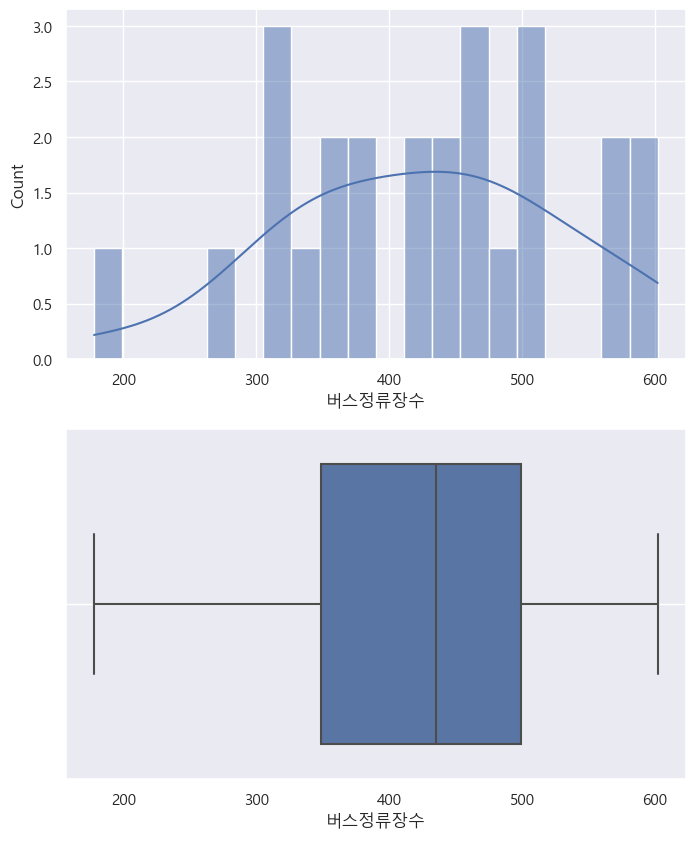

In [25]:
eda1_n(df4, '버스정류장수')

,count,mean,std,min,25%,50%,75%,max
세대,25.0,178057.76,56246.286878,63767.0,144725.0,181765.0,201926.0,285106.0


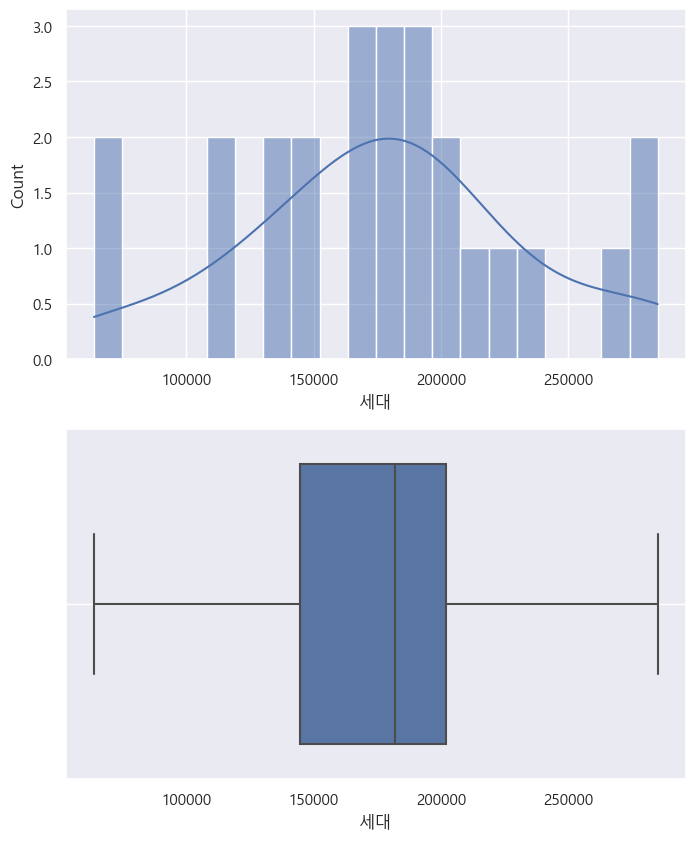

In [26]:
eda1_n(df4,'세대')

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [18]:
def eda2_nn(data, var, target):
    #시각화
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    sns.scatterplot(x=var, y = target, data = data)
    
    plt.subplot(1,2,2)
    sns.regplot(x=var, y = target, data = data)
    
    sns.jointplot(x=var, y = target, data = data)
    plt.show()
    
    #수치화
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

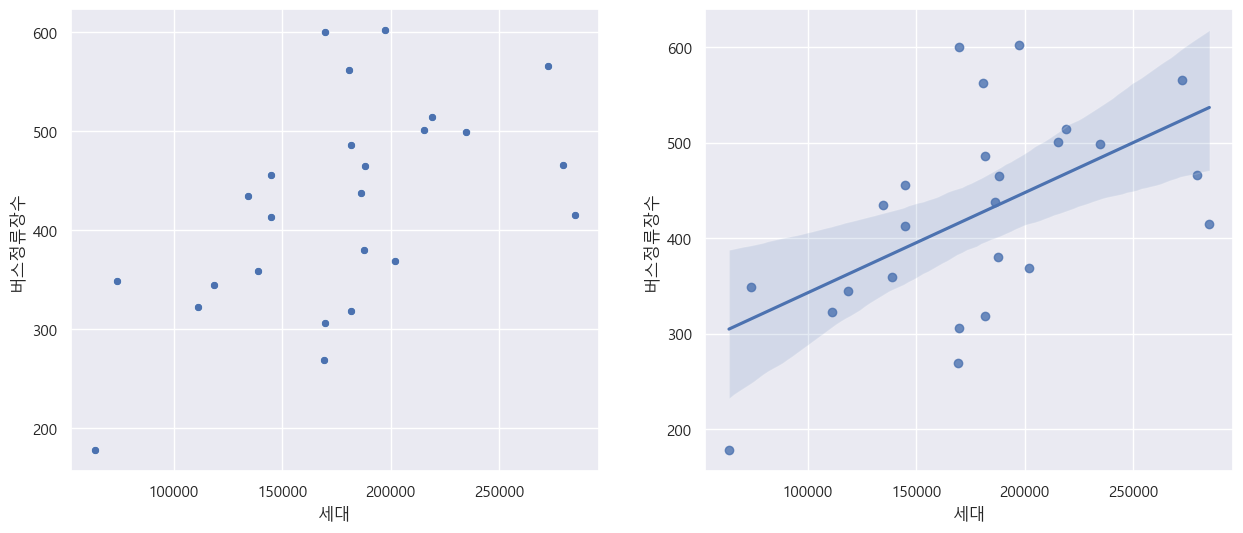

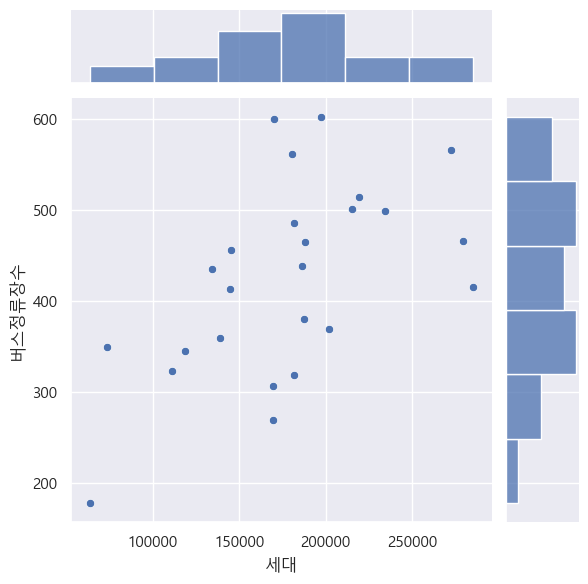

상관계수 : 0.5546647988285036, p-value : 0.00400799851320789


In [20]:
eda2_nn(df4, '세대', '버스정류장수')

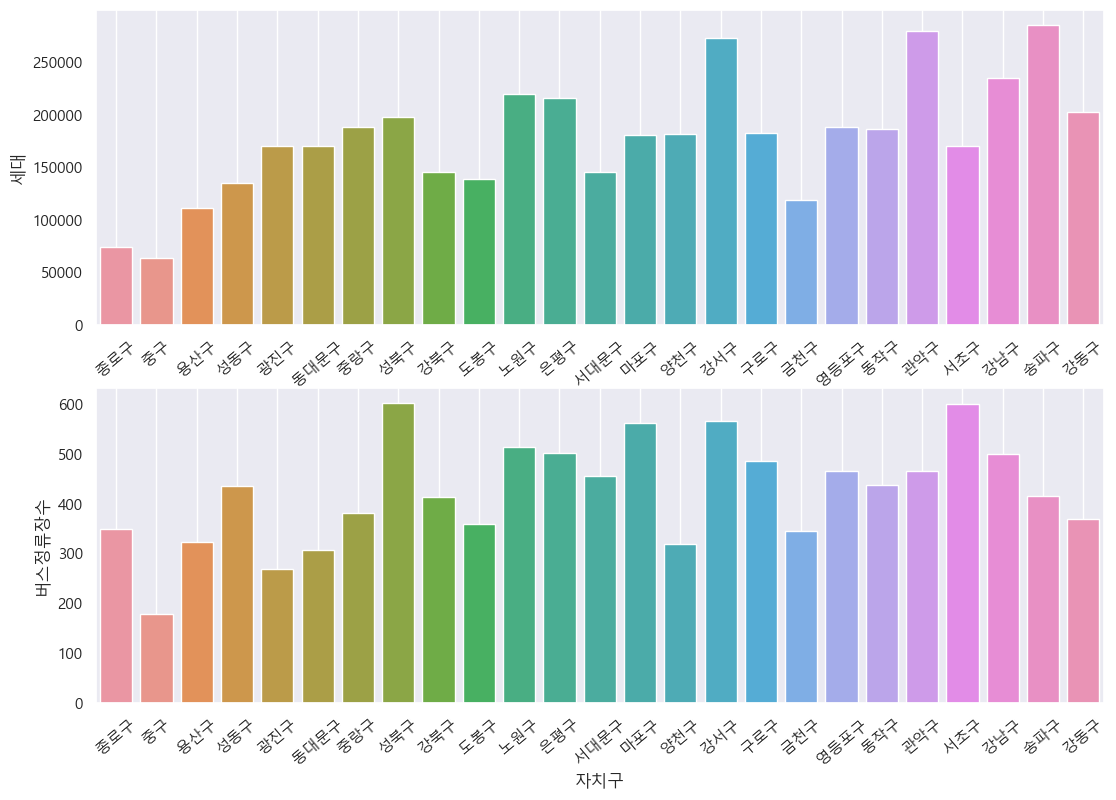

In [28]:
plt.figure(figsize=(13, 9))
plt.subplot(2,1,1)
sns.barplot(x = '자치구', y = '세대', data = df4)
plt.xticks(rotation = 40)
plt.grid()

plt.subplot(2,1,2)
sns.barplot(x = '자치구', y = '버스정류장수', data = df4)
plt.xticks(rotation = 40)
plt.grid()
plt.show()

In [30]:
df4.loc[(df4['세대']>= df4['세대'].mean())&(df4['버스정류장수']<=df4['버스정류장수'].mean()),'자치구']

6     중랑구
14    양천구
23    송파구
24    강동구
Name: 자치구, dtype: object

In [42]:
tmp=df4.copy()
tmp['세대/버스정류장수']=tmp['세대']/tmp['버스정류장수']
tmp.head(3)

,도착 시군구 코드,자치구,평균 이동 시간(분),평균 이동인구,총 이동시간,총 이동인구,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,한식일반음식점업(종사자),커피전문점(종사자),기타주점업(종사자),세대,인구,65세이상고령자,세대/버스정류장수
0,11010,종로구,30.278479,29.153578,23722310,22840982.81,349,106,5468935,5205394,131.889620,125.534028,5912,3613,1413,73766,153684,28064,211.363897
1,11020,중구,29.803839,29.298197,23806740,23402842.95,178,103,3776675,3598932,121.020124,115.324511,6414,3542,982,63767,131450,24742,358.241573
2,11030,용산구,29.478435,23.819052,21306040,17215624.50,323,67,4189977,4086474,137.891694,134.485421,2987,2076,1332,111207,236518,39461,344.294118


In [43]:
tmp['세대/버스정류장수'].sort_values(ascending=False)

23    687.002410
4     630.048327
20    599.469957
14    569.796238
5     554.558824
24    547.224932
6     493.928947
15    481.575972
22    470.164329
11    429.497006
10    426.196498
19    425.614155
18    404.716129
9     386.729805
16    374.312757
1     358.241573
8     350.423729
2     344.294118
17    344.049275
7     327.734219
13    321.533808
12    318.078947
3     309.271264
21    283.158333
0     211.363897
Name: 세대/버스정류장수, dtype: float64

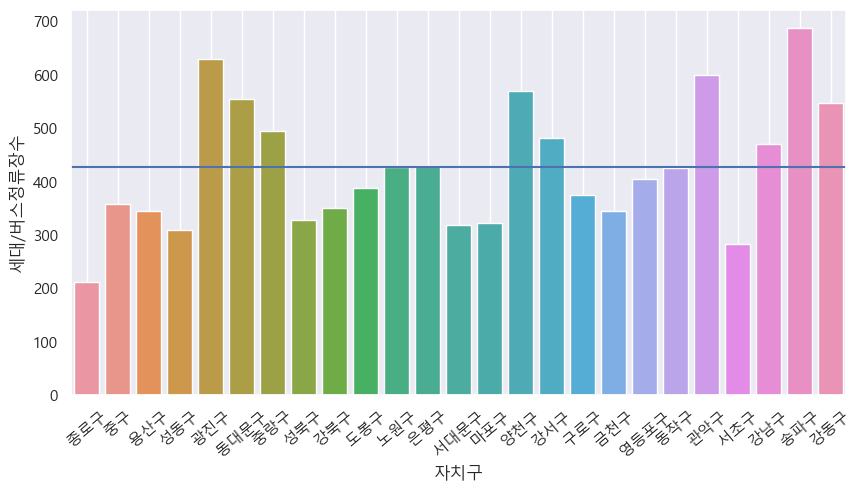

In [45]:
plt.figure(figsize=(10, 5))

sns.barplot(x = '자치구', y = '세대/버스정류장수', data = tmp)
plt.axhline(tmp['세대/버스정류장수'].mean())
plt.xticks(rotation = 40)
plt.grid()

plt.show()

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

<AxesSubplot:>

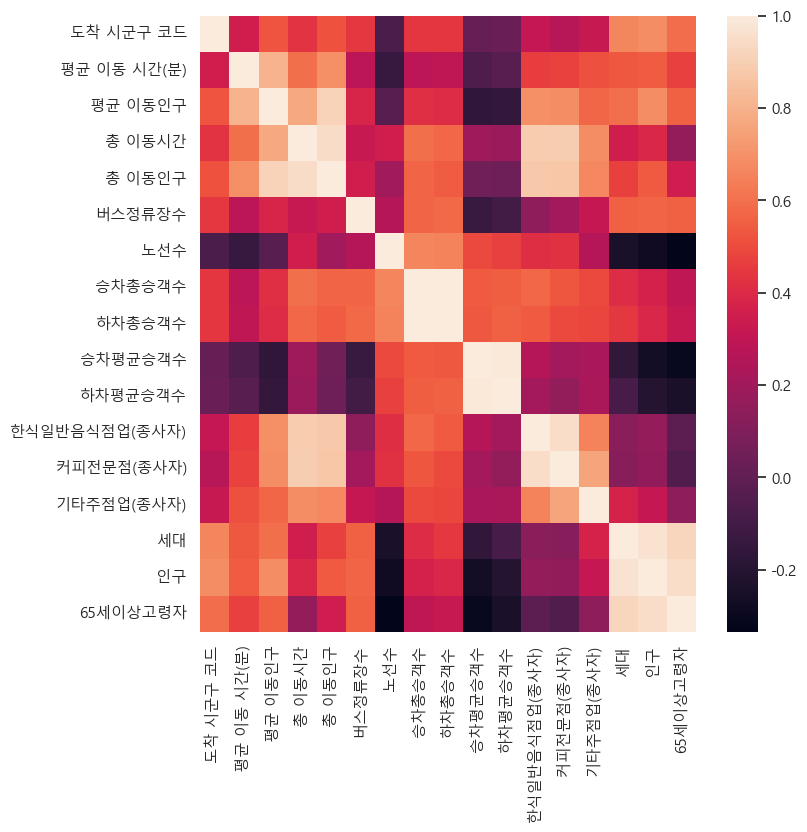

In [46]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(8,8))#크기 꼭 해주기.
sns.heatmap(df4.corr())

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

택시운송업(종사자)-노선수

### 2) 약한 관계의 변수

세대수-정류장수, 이동인구-노선수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

* 총 이동인구수/노선수 로 보아 강동구와 송파구에 노선을 더 추가할 필요가 있어보임.
* 택시운송업 종사자가 많은 곳에 버스노선수가 적으므로 강서구 중랑구에 노선을 추가해야함.
* 세대가 많은 지역일수록 정류장 수가 많아야함-> 송파구,관악구,중랑구,양천구에 버정을 추가해야한다.

=> 노선수와 버스정류장 수가 부족한 중랑구에 교통에 대한 개선이 필요함.